<h1 id="header" align="center">
  Car Price Prediction - Exploratory data analysis.
  <img src="https://media.tenor.com/UtkIFBDTlAAAAAAi/car-cars.gif" width="40px"/>
</h1>

---

### Вступление

_EDA(разведочный анализ данных)_ - это процесс изучения основных свойств данных, нахождения в них закономерностей, аномалий и различных распределений, построений моделей с помощью визуализации.

Известно, что не существует единой последовательности операций для выполнения анализа, но есть **базовые пункты**, которые необходимо выполнить.

Данный разведочный анализ данных проводится в рамках изучения _дисциплины "Инижиниринг управления данными" в университете ИТМО_ и будет проводиться на **выбранном в kaggle dataset**.

### Информация об dataset.

_Dataset - Car Price Prediction Challenge_ - является набором данных об различных проданных автомобилях с их параметрами.  
Например:
1) Manufacturer (Производитель)
2) Leather interior (Кожаный салон)
3) Fuel type (Тип топлива)
4) ...

Всего таких параметров - **15**.

Ссылка на оригинальный dataset - https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download  
Ссылка на dataset, сохраненный в Google Drive - https://docs.google.com/spreadsheets/d/1PMhtD3LqyCzlZMEh-8aDPxre0wPw8v0U/edit?usp=drive_link&ouid=100105970921534140705&rtpof=true&sd=true


### Цель (target) EDA.

Целью текущего EDA является -  __выявление ключевых факторов (features), влияющих на стоимость__.  
  
Кроме того передо мной стоит цель соответствовать следующим __метрикам__ (как минимум первым двум):

![Metrics](./images/Metrics.png)

---

### Этапы EDA.

#### 1) Загрузка данных с сайта и сохранения их в директории для дальнейшего взаимодействия

>[!IMPORTANT]  
>Не забываем добавить в нашего окружение (Conda+Poetry) необходимые зависимости:
>1) _pandas_
>2) _numpy_
>3) _seaborn_
>4) _matplotlib_
>5) _openpyxl_
>Всегда активируем окружение как рассказано в файле [README.md](../README.md).

Первостепенно, так как наш датасет лежит не в директории проекта, необходимо выполнить создание папки data в корневой директории. А затем выполнить загрузку туда "сырых данных" в формате xlsx.  
Также в данном пункте выполним подключение основных библиотек для проведения дальнейшего EDA.







In [199]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

FILE_ID = "1PMhtD3LqyCzlZMEh-8aDPxre0wPw8v0U"  # ID файла на Google Drive
file_url = f"https://drive.google.com/uc?id={FILE_ID}"

pd.set_option("display.max_columns", 20) # убирает ограничения отображения dataset
pd.set_option("display.max_rows", 150)

data_dir = "../data" # создаем директорию data в директории notebooks.
if not os.path.exists(data_dir):
    os.makedirs(data_dir) 

data_path = os.path.join(data_dir, "data_car.xlsx") # путь до файла dataset

if os.path.isfile(data_path): # если файл есть в data - читаем, если нет - скачиваем
    df = pd.read_excel(data_path)
    df = df.replace("-", pd.NA)  # убираем все ложные пропуски на NaN
    print(f"{'-'*60}")
    print ("Dataset прочитан из директории data...")
    print(f"{'-'*60}")
else:
    response = requests.get(file_url)
    f_path = os.path.join(data_dir, "data_car.xlsx")
    with open(f_path, "wb") as f:
        f.write(response.content)

    df = pd.read_excel(f_path)
    df = df.replace("-", pd.NA)  # убираем все ложные пропуски на NaN
    print(f"{'-'*60}")
    print("Dataset загружен в директорию data и прочитан...")
    print(f"{'-'*60}")


------------------------------------------------------------
Dataset прочитан из директории data...
------------------------------------------------------------


#### 2) Первичный осмотр данных

После чтения/загрузки dataset в директории необходимо посмотреть, что было загружено.  
Кроме того необходимо первично оценить данные, которыми наполнен файл xlsx.  
Поэтому выведем 10 первых и 10 последних значений dataset. И проверим вообще количество признаков и элементов.

In [200]:
df.head(10)        

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,<NA>,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,<NA>,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [201]:
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,<NA>,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,<NA>,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [202]:
df.shape

(19237, 18)

Также предлагаю исследовать какие типы данных содержат 18 признаков.

In [203]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

#### 3) Операции над данными.

После того как мы первично просмотрели наши данные, то можно выполнить опеределенные действия для дальнейшего удобства анализа.  
Например - _решение проблемы пустых значений, дубликатов и выбросов, удаление ненужных для текущей target признаков и приведение типов_ 

##### 3.1) Удаление признаков
Так как наша цель заключается в ранжировании признаков по их влиянию на ценообразование, я предлагаю удалить следующие признаки:
- cylinders - так как основной акцент на ценообразование будет от типа двигателя, а не от количества цилиндров.
- drive wheels - опять таки минимальный эффект на ценообразование, плюс тип привода завязан на моделе авто и его типа.
- color - минимальное влияния на цену автомобиля.
- airbags - минимальное влияние на цену автомобиля.


In [204]:
df = df.drop(['Cylinders', 'Drive wheels', 'Color', 'Airbags'], axis=1)
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,Tiptronic,04-May,Left wheel
2,45774419,8467,<NA>,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,04-May,Left wheel


##### 3.2) Проверка нечисловых признаков
Так как типы данных могуть быть числовыми и нечисловыми, то следует рассмотреть их точнее и в последствии привести их к нужному типу.

In [205]:
df.select_dtypes(exclude="number").head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,04-May,Left wheel
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,04-May,Left wheel
2,<NA>,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,04-May,Right-hand drive
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,04-May,Left wheel
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,04-May,Left wheel


Как мы видим `Levy` и `Mileage` скорее числовые признаки, нежели нечисловые. При этом в `Levy` имеются пропуски, а в `Mileage` приписка km. Давайте это исправим.  

Перед этим посмотрим на количество в `Levy` пустых значений.

In [206]:
df.isna().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Gear box type          0
Doors                  0
Wheel                  0
dtype: int64

**Визуальное отображение пропусков:**

Text(0, 0.5, 'Sample Number')

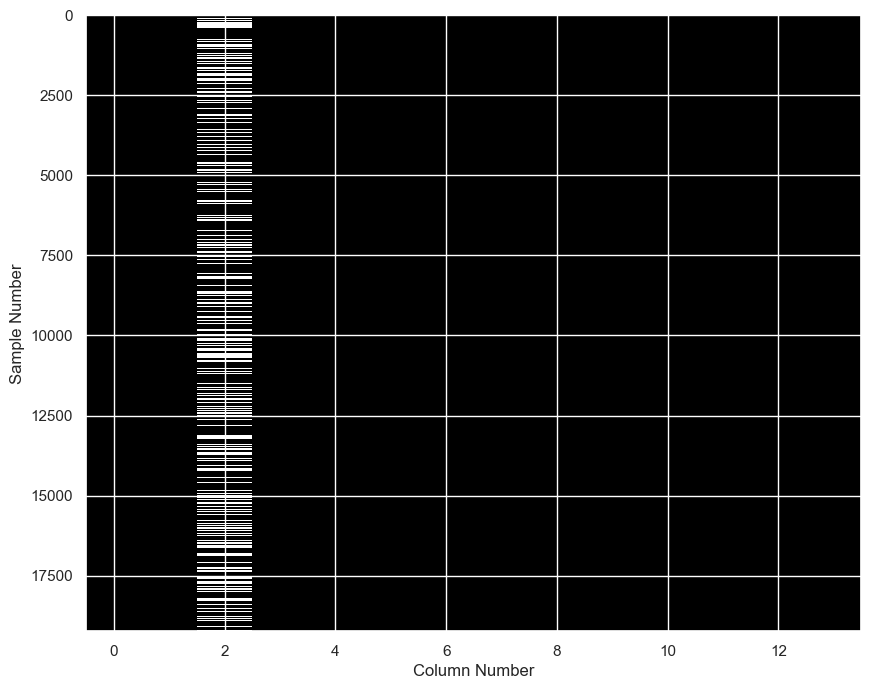

In [207]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

Как мы можем увидеть _количество пропусков в признаке `Levy` - очень большое_. И при этом признак, предполагается, одним из важнейших, так как содержит налог на автомобиль.  
Следовательно, лучшим выходом будет выполнить **заполнение по медиане**.

In [208]:
df["Levy"] = df["Levy"].astype("Int16") # данный тип данных позволяет преобразовать признак с пропусками
df["Levy"] = df["Levy"].fillna(df["Levy"].median())
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Gear box type       0
Doors               0
Wheel               0
dtype: int64

Теперь примемся за признак `Mileage`. Нам необходимо привести его в числовой тип, при этом убрав приписку km.

In [209]:
df["Mileage"] = df["Mileage"].str.replace(" km", "", regex=False)
df["Mileage"].head(10)

0    186005
1    192000
2    200000
3    168966
4     91901
5    160931
6    258909
7    216118
8    398069
9    128500
Name: Mileage, dtype: object

In [210]:
df["Mileage"] = df["Mileage"].astype("int32")
df["Mileage"].head(10)

0    186005
1    192000
2    200000
3    168966
4     91901
5    160931
6    258909
7    216118
8    398069
9    128500
Name: Mileage, dtype: int32

Еще раз посмотрим на нечисловые признаки, чтобы проверить упустили ли мы что-то.

In [211]:
df.select_dtypes(exclude="number").head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Doors,Wheel
0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,Automatic,04-May,Left wheel
1,CHEVROLET,Equinox,Jeep,No,Petrol,3,Tiptronic,04-May,Left wheel
2,HONDA,FIT,Hatchback,No,Petrol,1.3,Variator,04-May,Right-hand drive
3,FORD,Escape,Jeep,Yes,Hybrid,2.5,Automatic,04-May,Left wheel
4,HONDA,FIT,Hatchback,Yes,Petrol,1.3,Automatic,04-May,Left wheel


Признак `Engine volume` оставляем нечисловым, так как помимо объема двигателя в признаке указывается - *с турбонаддувом двигатель или нет*

##### 3.3) Проверка числовых признаков
Настала очередь посмотреть числовые признаки датасета. Кроме того дополнительно проверим нахождения тут измененных признаков из пункта выше.

In [212]:
df.select_dtypes(include="number").head()

,ID,Price,Levy,Prod. year,Mileage
0,45654403,13328,1399,2010,186005
1,44731507,16621,1018,2011,192000
2,45774419,8467,781,2006,200000
3,45769185,3607,862,2011,168966
4,45809263,11726,446,2014,91901


Все хорошо, теперь можно рассмотреть количество уникальных значений в каждом из признаков. Это поможет точнее выбрать тип для приведения.

<Axes: title={'center': 'Unique values per feature'}>

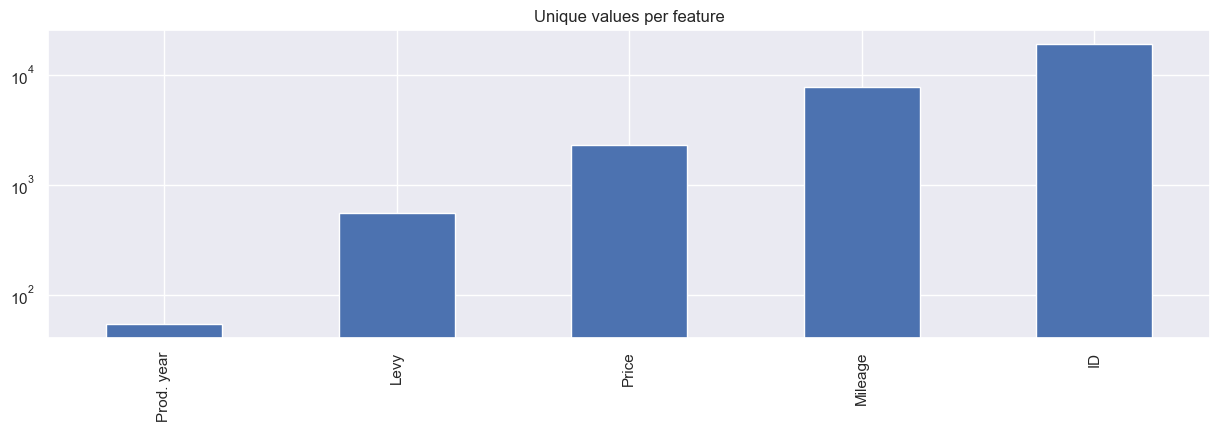

In [213]:
uniq_val = df.select_dtypes(include="number").nunique().sort_values()
uniq_val.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

##### 3.4) Проверка дубликатов

Так как мы хотим добиться уникальности записей, то необходимо провести над нашими данными **проверку дубликатов** по их ID.

In [214]:
df.shape

(19237, 14)

In [215]:
duplic_rows_df = df[df.duplicated()]
duplic_rows_df.shape

(313, 14)

О, их оказалось не так много, учитывая весь объем датасета. Поэтому мы можем их смело удалить.

In [216]:
df = df.drop_duplicates()
df.shape

(18924, 14)

##### 3.5) Переименование признаков

Анализируя данные пришел к выводу, что необходимо бы переименовать некоторые признаки, так как они мало отражают содержащиеся в них сведения.  
Все переименования будут указны также в файле [NAMING.txt](../docs/NAMING.txt) в директории **docs**.  
Перед этим выведем названия.

In [217]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,Tiptronic,04-May,Left wheel
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,04-May,Left wheel


In [218]:
df = df.rename(columns={"Levy":"Tax", "Prod. year":"Release_year", "Category":"Car_type", "Gear box type":"Transmission_type"})
df.head()

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,Tiptronic,04-May,Left wheel
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,04-May,Left wheel


##### 3.6) Обнаружение и обработка выбросов в числовых признаках

Важно предупредить момент выбросов и ошибочных огромных значений в числовых параметрах. Особенно перед приведением типов.  
Кроме того такие выбросы будут негативно влиять на наш конечный вывод, что приведет к некорректному решению поставленной цели.  
Вызовем для отображения снова числовые параметры.

In [219]:
df.select_dtypes(include="number").head()

,ID,Price,Tax,Release_year,Mileage
0,45654403,13328,1399,2010,186005
1,44731507,16621,1018,2011,192000
2,45774419,8467,781,2006,200000
3,45769185,3607,862,2011,168966
4,45809263,11726,446,2014,91901


<Axes: xlabel='Price'>

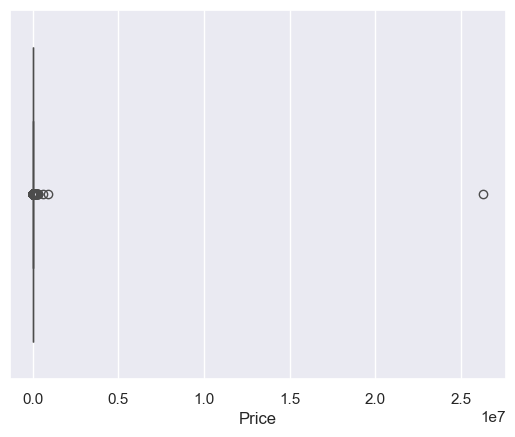

In [220]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Tax'>

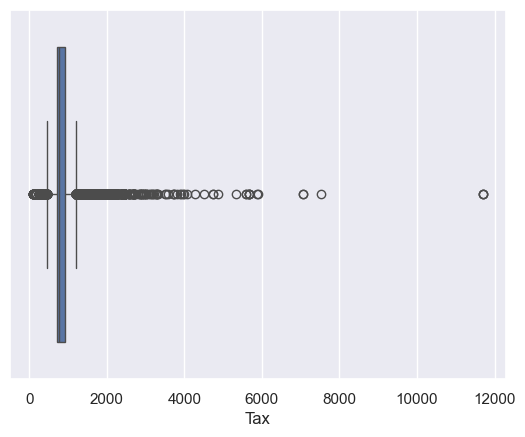

In [221]:
sns.boxplot(x=df['Tax'])

<Axes: xlabel='Release_year'>

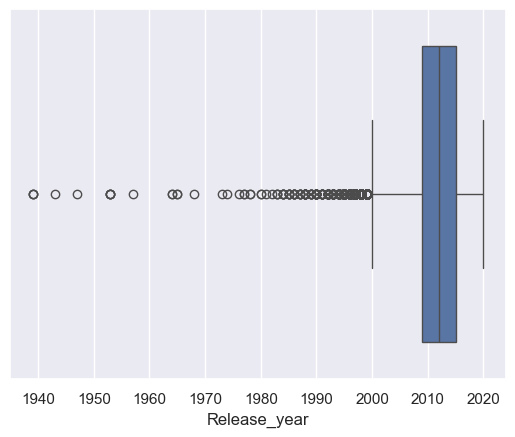

In [222]:
sns.boxplot(x=df["Release_year"])

<Axes: xlabel='Mileage'>

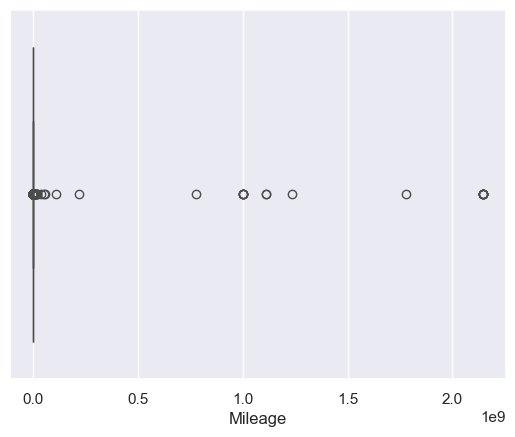

In [223]:
sns.boxplot(x=df["Mileage"])

Как видно по графикам - проблемы **есть**. А конкретно в признаках `Price`, `Tax`, `Mileage`.  
Это необходимо решать. Начнем с признака `Price`.

In [224]:
df["Price"].nlargest(5)

16983    26307500
8541       872946
1225       627220
5008       308906
9367       297930
Name: Price, dtype: int64

Давайте посмотрим какие автомобили имеют такой ценник...

In [225]:
df[df["Price"].isin([26307500, 872946, 627220])]

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
1225,45795524,627220,781,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0,Tiptronic,04-May,Left wheel
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531,Tiptronic,04-May,Left wheel
16983,45812886,26307500,781,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,Manual,02-Mar,Left wheel


Так, мы нашли проанализировали выбросы и первые два автомобиля - имеют адекватную цену. А вот третий - _Opel Combo_ не может стоить такую сумму. Это необходимо исправить.

In [226]:
df['Price'] = df['Price'].mask(df['Price'] > 900000, df['Price'].median())
df["Price"].nlargest(5)

8541     872946
1225     627220
5008     308906
9367     297930
14839    297930
Name: Price, dtype: int64

_Что мы сделали?_  
Так как в признаке мы обнаружили и определили единичный выброс с суммой, которая невозможна для того типа автомобиля (<ins>цены указаны в долларах</ins>).  
Поэтому было принято решение заменить этот выброс на **медианное значение**.  
Ниже снова выведем график `Price`:

<Axes: xlabel='Price'>

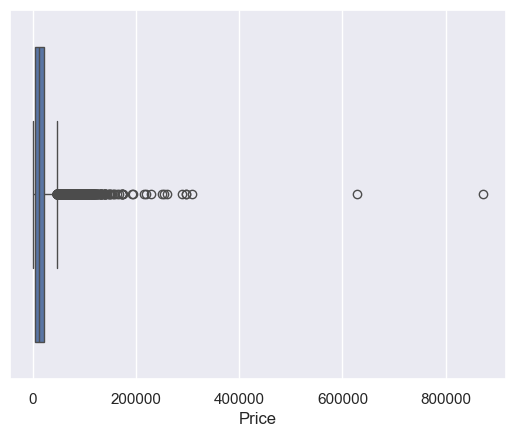

In [227]:
sns.boxplot(x=df["Price"])

Теперь проанализируем `Tax`

In [228]:
df["Tax"].nlargest(10)

115      11714
18984    11714
18957    11706
17117     7536
3994      7063
2159      7058
5529      5908
5367      5877
17767     5681
2323      5679
Name: Tax, dtype: Int16

Опять посмотрим на автомобили:

In [229]:
df[df["Tax"].isin([11714, 11706, 7536, 7063, 7058])]

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
115,45534351,11917,11714,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000,Tiptronic,04-May,Right-hand drive
2159,45804871,10349,7058,SUBARU,Legacy,2005,Sedan,Yes,Petrol,3,147000,Tiptronic,04-May,Right-hand drive
3994,45782188,13172,7063,TOYOTA,Alphard,2003,Minivan,Yes,LPG,3,190000,Automatic,04-May,Right-hand drive
17117,45781442,7213,7536,MITSUBISHI,Pajero,2000,Jeep,Yes,CNG,3.2,210000,Automatic,04-May,Right-hand drive
18957,44674964,14740,11706,MERCEDES-BENZ,E 500 AVG,2005,Sedan,Yes,Petrol,5,56000,Tiptronic,04-May,Right-hand drive
18984,45221191,11917,11714,MERCEDES-BENZ,E 500,2003,Sedan,Yes,Petrol,5,150000,Tiptronic,04-May,Right-hand drive


Просмотрев на автомобили с такими налогами стало понятно - **выбросов в признаке НЕТ!**

Теперь проверим признак `Mileage`:

In [231]:
df["Mileage"].nlargest(10)

2278     2147483647
6157     2147483647
11901    2147483647
12734    2147483647
15347    2147483647
15393    2147483647
19167    2147483647
17582    1777777778
7724     1234567899
9524     1111111111
Name: Mileage, dtype: int32

Так, в этом признаке явно что-то аномальное. Проверим с помощью _межквартильного размаха(IQR)_.  
<ins>Определение IQR</ins> - это статистическая мера, показывающая разброс средних 50% данных, отсекая крайние значения.

In [ ]:
Q1_Mil = df["Mileage"].quantile(0.25)
Q3_Mil = df["Mileage"].quantile(0.75)
IQR_Mil = Q3_Mil-Q1_Mil
up_bound_Mil = Q3_Mil + 1.5 * IQR_Mil
down_bound_Mil = Q1_Mil - 1.5 * IQR_Mil

errors = df[df["Mileage"] > up_bound_Mil]
errors_type_2 = df[df["Mileage"] < down_bound_Mil]
len(errors) # количество записей-выбросов выше верхней границы

635

In [ ]:
len(errors_type_2) # количество записей-выбросов ниже нижней границы

0

Проведя IQR для признака можно сделать вывод, что 635 значений - у нас точно являются выбросами или некорректными значениями.  
Так как у нас почти __19000 строчек__, то принимаем решение по удалению этих выбросов.

In [ ]:
df = df[df["Mileage"] <= up_bound_Mil] # оставляем в Mileage только те значения, которые попали до верхней границы
df["Mileage"].nlargest(10)

1086     367053
7259     367000
14709    367000
4961     366869
8948     366869
9125     366869
10944    366869
15132    366869
16628    366869
9840     365810
Name: Mileage, dtype: int32

<Axes: xlabel='Mileage'>

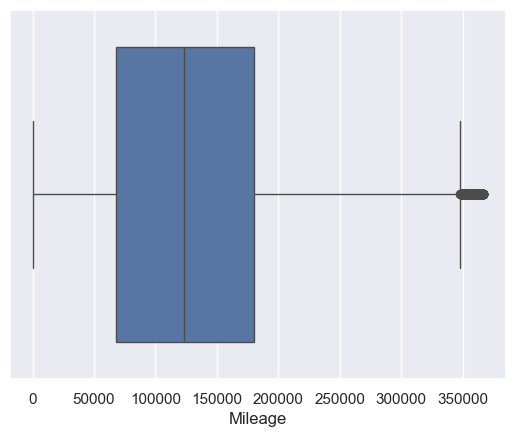

In [239]:
sns.boxplot(x=df["Mileage"])

_Вывод_ - мы задетектировали выбросы в числовых признаках и их убрали.